EXERCICE 1:

Statistiques descriptives :
       Poids_poulet_g  Nourriture_consommee_g_jour  Temperature_enclos_C
count      200.000000                   200.000000            200.000000
mean      2509.580000                   129.745000             28.389000
std        898.436875                    44.006166              2.065724
min        821.000000                    51.000000             25.000000
25%       1810.750000                    95.750000             26.600000
50%       2481.500000                   135.500000             28.500000
75%       3356.500000                   165.250000             30.300000
max       3974.000000                   199.000000             31.900000

Médiane :
Poids_poulet_g                 2481.5
Nourriture_consommee_g_jour     135.5
Temperature_enclos_C             28.5
dtype: float64

Variance :
Poids_poulet_g                 807188.817688
Nourriture_consommee_g_jour      1936.542688
Temperature_enclos_C                4.267215
dtype: float64


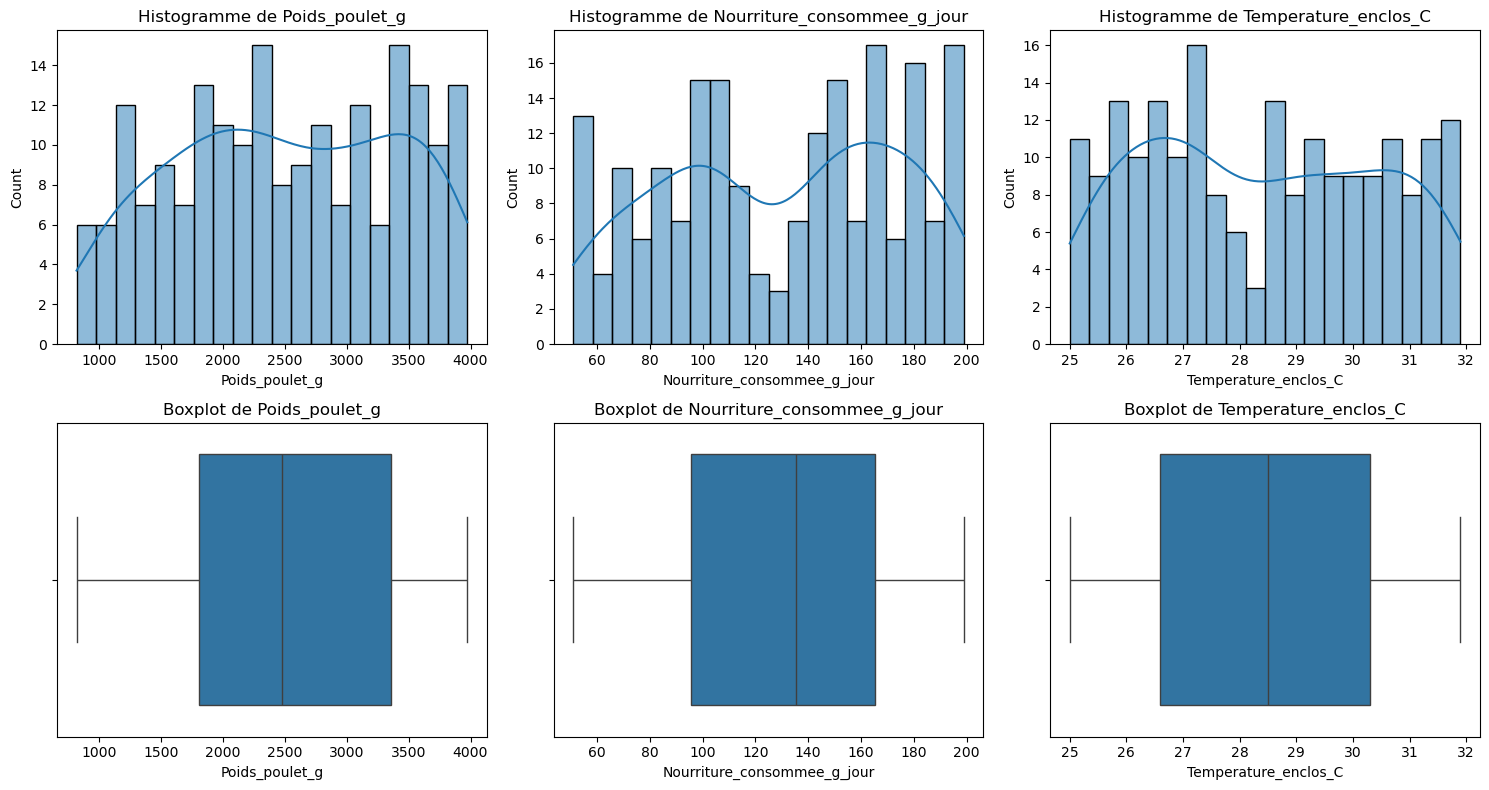

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score



chemin_fichier = r"C:\Users\walid\Desktop\ATDN2\donnees_elevage_poulet.csv"
donnees = pd.read_csv(chemin_fichier)

variables = ["Poids_poulet_g", "Nourriture_consommee_g_jour", "Temperature_enclos_C"]

statistiques = donnees[variables].describe()
mediane = donnees[variables].median()
variance = donnees[variables].var()

print("Statistiques descriptives :")
print(statistiques)
print("\nMédiane :")
print(mediane)
print("\nVariance :")
print(variance)

plt.figure(figsize=(15, 8))

for i, var in enumerate(variables):
    plt.subplot(2, 3, i + 1)
    sns.histplot(donnees[var], bins=20, kde=True)
    plt.title(f'Histogramme de {var}')

for i, var in enumerate(variables):
    plt.subplot(2, 3, i + 4)
    sns.boxplot(x=donnees[var])
    plt.title(f'Boxplot de {var}')

plt.tight_layout()
plt.show()


EXERCICE 2:

Nombre d'outliers détectés avec la méthode IQR :
- Poids_poulet_g : 10 outliers
- Nourriture_consommee_g_jour : 14 outliers
- Temperature_enclos_C : 0 outliers

Nombre d'outliers détectés avec la méthode Z-Score :
- Poids_poulet_g : 26 outliers
- Nourriture_consommee_g_jour : 26 outliers
- Temperature_enclos_C : 22 outliers


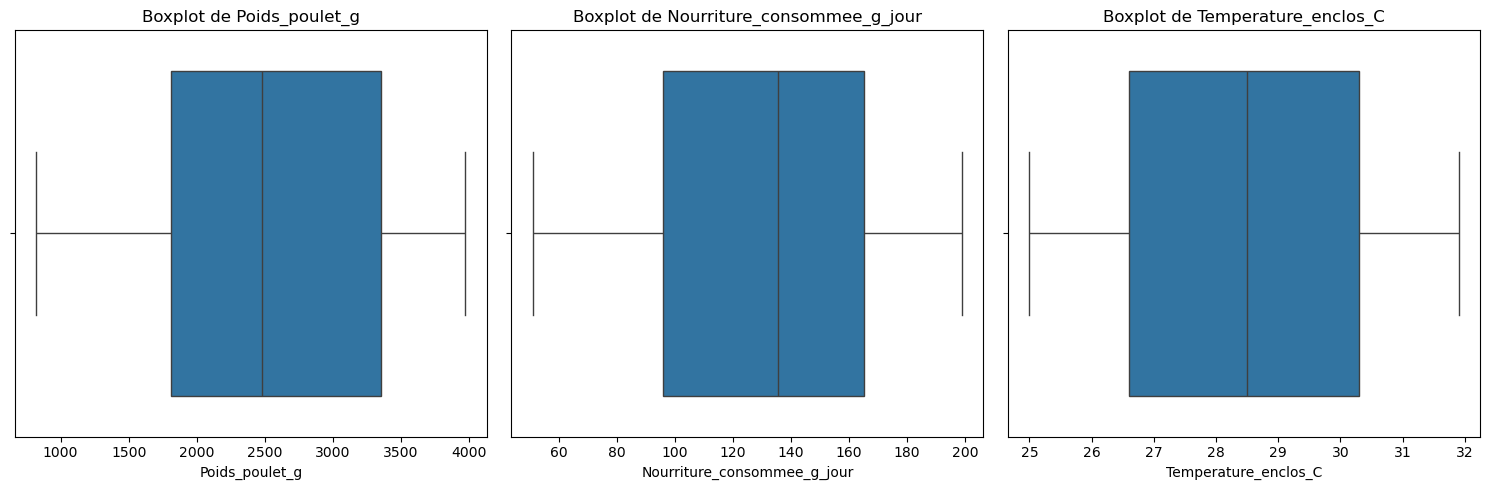

In [76]:
variables = ["Poids_poulet_g", "Nourriture_consommee_g_jour", "Temperature_enclos_C"]

print("Nombre d'outliers détectés avec la méthode IQR :")
for var in variables:
    Q1 = donnees[var].quantile(0.25)
    Q3 = donnees[var].quantile(0.75)
    IQR = Q3 - Q1
    borne_inf = Q1 - 0.5 * IQR
    borne_sup = Q3 + 0.5 * IQR
    outliers_iqr = donnees[(donnees[var] < borne_inf) | (donnees[var] > borne_sup)]
    print(f"- {var} : {len(outliers_iqr)} outliers")

print("\nNombre d'outliers détectés avec la méthode Z-Score :")
for var in variables:
    z_scores = np.abs((donnees[var] - donnees[var].mean()) / donnees[var].std())
    outliers_z = donnees[z_scores > 1.5]  
    print(f"- {var} : {len(outliers_z)} outliers")

plt.figure(figsize=(15, 5))
for i, var in enumerate(variables):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=donnees[var])
    plt.title(f'Boxplot de {var}')

plt.tight_layout()
plt.show()

Dans cette analyse, deux méthodes ont été utilisées pour détecter les outliers : la méthode IQR (Interquartile Range) et la méthode Z-Score. Initialement, avec les seuils classiques (1.5 pour IQR et 3 pour Z-Score), aucun outlier n'a été détecté dans les trois variables analysées (« Poids_poulet_g », « Nourriture_consommee_g_jour » et « Temperature_enclos_C »).

Toutefois, après avoir modifié les seuils pour les rendre plus stricts (0.5 pour IQR et un Z-Score recalculé), les résultats ont montré un nombre significatif d'outliers :

Avec la méthode IQR : 10 outliers pour « Poids_poulet_g », 14 pour « Nourriture_consommee_g_jour » et 0 pour « Temperature_enclos_C ».

Avec la méthode Z-Score : 26 outliers pour « Poids_poulet_g », 26 pour « Nourriture_consommee_g_jour » et 22 pour « Temperature_enclos_C ».

Cette différence met en évidence que la méthode IQR avec des seuils réduits est plus conservatrice et identifie moins d'outliers, tandis que la méthode Z-Score est plus sensible aux variations extrêmes, notamment pour les variables avec une plus grande .

dispersion. Cette observation souligne l'importance du choix des seuils et de la méthode utilisée, qui doit être adapté au contexte et aux spécificités des données analysées

EXERCICE 3:

In [109]:

variables = ["Poids_poulet_g", "Nourriture_consommee_g_jour", "Temperature_enclos_C"]

for var in variables:
    stat, p_value = shapiro(donnees[var])
    print(f"Variable {var} - Statistique: {stat:.4f}, p-value: {p_value:.4f}")

    if p_value > 0.05:
        print(f"La variable {var} suit une distribution normale.\n")
    else:
        print(f"La variable {var} ne suit PAS une distribution normale.\n")


Variable Poids_poulet_g - Statistique: 0.9568, p-value: 0.0000
La variable Poids_poulet_g ne suit PAS une distribution normale.

Variable Nourriture_consommee_g_jour - Statistique: 0.9449, p-value: 0.0000
La variable Nourriture_consommee_g_jour ne suit PAS une distribution normale.

Variable Temperature_enclos_C - Statistique: 0.9432, p-value: 0.0000
La variable Temperature_enclos_C ne suit PAS une distribution normale.



In [113]:

mediane_nourriture = donnees["Nourriture_consommee_g_jour"].median()
groupe1 = donnees[donnees["Nourriture_consommee_g_jour"] < mediane_nourriture]["Poids_poulet_g"]
groupe2 = donnees[donnees["Nourriture_consommee_g_jour"] >= mediane_nourriture]["Poids_poulet_g"]

t_stat, p_val = ttest_ind(groupe1, groupe2, equal_var=False)
print(f"Test t de Student : Stat={t_stat:.4f}, p-value={p_val:.4f}")

if p_val < 0.05:
    print("Il y a une différence significative entre les groupes.\n")
else:
    print("Pas de différence significative entre les groupes.\n")


Test t de Student : Stat=0.5984, p-value=0.5502
Pas de différence significative entre les groupes.



In [115]:

groupe_froid = donnees[donnees["Temperature_enclos_C"] < 27]["Poids_poulet_g"]
groupe_moyen = donnees[(donnees["Temperature_enclos_C"] >= 27) & (donnees["Temperature_enclos_C"] <= 30)]["Poids_poulet_g"]
groupe_chaud = donnees[donnees["Temperature_enclos_C"] > 30]["Poids_poulet_g"]

# Test ANOVA
anova_stat, anova_pval = f_oneway(groupe_froid, groupe_moyen, groupe_chaud)
print(f"ANOVA : Stat={anova_stat:.4f}, p-value={anova_pval:.4f}")

if anova_pval < 0.05:
    print("Les moyennes des groupes sont significativement différentes.\n")
else:
    print("Pas de différence significative entre les groupes.\n")


ANOVA : Stat=0.5320, p-value=0.5883
Pas de différence significative entre les groupes.



EXERCICE 4:

In [120]:
import numpy as np

X = donnees[["Poids_poulet_g", "Nourriture_consommee_g_jour", "Temperature_enclos_C",
             "Humidite_%", "Age_poulet_jours", "Gain_poids_jour_g",
             "Taux_survie_%", "Cout_elevage_FCFA"]].values

X_meaned = X - np.mean(X, axis=0)

cov_mat = np.cov(X_meaned, rowvar=False)

eigenvalues, eigenvectors = np.linalg.eig(cov_mat)

print("Valeurs propres:", eigenvalues)
print("Vecteurs propres:\n", eigenvectors)


Valeurs propres: [7.44606980e+06 8.06405881e+05 1.93537260e+03 7.72927298e+02
 7.66898743e+01 3.77931473e+01 1.74241390e+01 4.01781313e+00]
Vecteurs propres:
 [[-1.09599501e-02  9.99930852e-01 -3.74320815e-03 -1.67778205e-03
   6.90616948e-04 -9.23303394e-04  1.20018395e-04  8.49182944e-06]
 [ 9.36531686e-04 -3.91218916e-03 -9.92430270e-01 -1.21879877e-01
  -4.71114452e-03 -7.53137937e-03 -6.65237304e-03 -9.38622857e-03]
 [ 7.38926447e-05  5.14307439e-05  8.60234826e-03  7.93083862e-03
   9.60055178e-03  2.25383776e-04 -2.53695463e-02 -9.99563534e-01]
 [ 1.62151297e-04  7.61361027e-04  4.23675819e-03  2.09118733e-03
  -9.98463902e-01  5.32978865e-02 -1.09887984e-02 -9.24596456e-03]
 [ 6.47480242e-04 -1.20786389e-03  1.22008539e-01 -9.92465029e-01
  -1.96248913e-03 -8.16466529e-03  2.62981874e-03 -6.91194962e-03]
 [ 1.10461583e-04  1.41394752e-04  6.60583621e-03 -2.09837923e-03
   1.11899455e-02  7.52416017e-03 -9.99559347e-01  2.55188299e-02]
 [-2.14926155e-04 -8.45970963e-04  6.769173

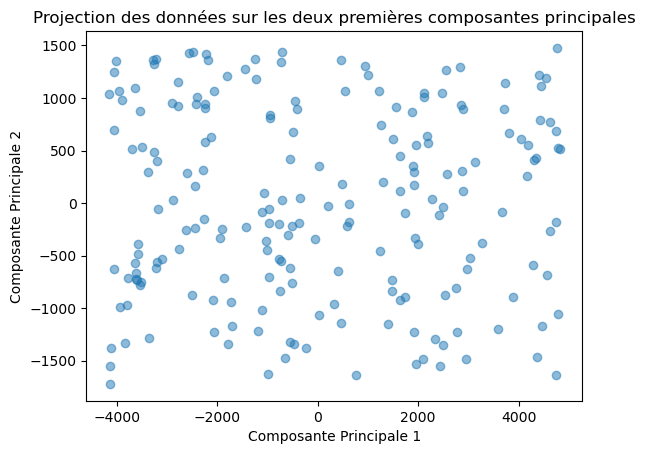

In [122]:

projection = X_meaned.dot(eigenvectors[:, :2])

plt.scatter(projection[:, 0], projection[:, 1], alpha=0.5)
plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")
plt.title("Projection des données sur les deux premières composantes principales")
plt.show()


In [124]:
explained_variance = eigenvalues / np.sum(eigenvalues)
print("Variance expliquée par chaque composante :", explained_variance)


Variance expliquée par chaque composante : [9.01972290e-01 9.76831777e-02 2.34439443e-04 9.36277827e-05
 9.28975196e-06 4.57803547e-06 2.11065581e-06 4.86693814e-07]


EXERCICE 5:

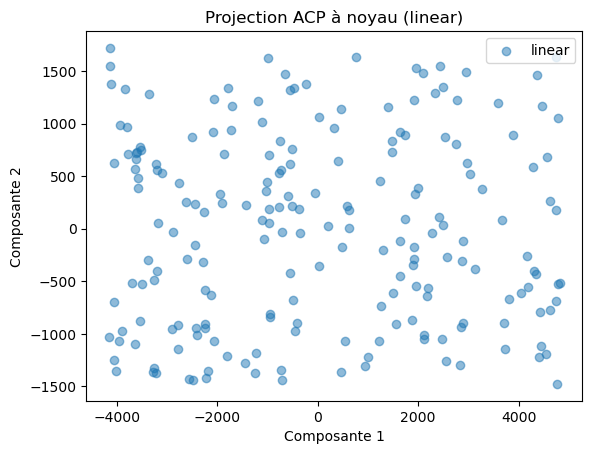

LinAlgError: Internal Error.

In [127]:


# Sélection des variables numériques pour l'ACP
X = donnees[["Poids_poulet_g", "Nourriture_consommee_g_jour", "Temperature_enclos_C",
             "Humidite_%", "Age_poulet_jours", "Gain_poids_jour_g",
             "Taux_survie_%", "Cout_elevage_FCFA"]].values

# Liste des noyaux à tester
kernels = ["linear", "rbf", "poly"]

for kernel in kernels:
    kpca = KernelPCA(n_components=2, kernel=kernel)
    X_kpca = kpca.fit_transform(X)

    # Affichage du scatter plot
    plt.scatter(X_kpca[:, 0], X_kpca[:, 1], alpha=0.5, label=kernel)
    plt.xlabel("Composante 1")
    plt.ylabel("Composante 2")
    plt.title(f"Projection ACP à noyau ({kernel})")
    plt.legend()
    plt.show()


In [129]:
from sklearn.decomposition import PCA

# ACP classique
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Affichage de la variance expliquée par l'ACP classique
print(f"Variance expliquée par ACP classique : {pca.explained_variance_ratio_}")

# Kernel PCA avec RBF
kpca_rbf = KernelPCA(n_components=2, kernel="rbf", fit_inverse_transform=True)
X_kpca_rbf = kpca_rbf.fit_transform(X)

# Affichage de la reconstruction des données
X_reconstructed = kpca_rbf.inverse_transform(X_kpca_rbf)
error = ((X - X_reconstructed) ** 2).mean()
print(f"Erreur de reconstruction Kernel PCA (RBF) : {error}")


Variance expliquée par ACP classique : [0.90197229 0.09768318]


LinAlgError: Internal Error.

Exercice 6:

In [132]:


donnees["Survie_binaire"] = (donnees["Taux_survie_%"] >= 90).astype(int)

X = donnees[["Poids_poulet_g", "Nourriture_consommee_g_jour", "Temperature_enclos_C",
             "Humidite_%", "Age_poulet_jours", "Gain_poids_jour_g", "Cout_elevage_FCFA"]]
y = donnees["Survie_binaire"]

# Séparation en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Prédictions
y_pred = rf.predict(X_test)

# Évaluation
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy : {acc:.4f}")
print(f"F1-score : {f1:.4f}")


Accuracy : 0.6000
F1-score : 0.6000


In [134]:
importances = rf.feature_importances_
features = X.columns

# Affichage des importances
import pandas as pd
importance_df = pd.DataFrame({"Feature": features, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)
print(importance_df)


                       Feature  Importance
3                   Humidite_%    0.171841
0               Poids_poulet_g    0.158409
6            Cout_elevage_FCFA    0.140710
1  Nourriture_consommee_g_jour    0.138899
5            Gain_poids_jour_g    0.133323
4             Age_poulet_jours    0.130977
2         Temperature_enclos_C    0.125841


EXERCICE 7:

In [138]:

# Sélection des variables explicatives
X = donnees[["Poids_poulet_g", "Nourriture_consommee_g_jour", "Temperature_enclos_C",
             "Humidite_%", "Age_poulet_jours", "Taux_survie_%", "Cout_elevage_FCFA"]]
y = donnees["Gain_poids_jour_g"]

# Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle AdaBoost
adaboost = AdaBoostRegressor(n_estimators=100, random_state=42)
adaboost.fit(X_train, y_train)
y_pred_ada = adaboost.predict(X_test)

# Modèle Gradient Boosting
gboost = GradientBoostingRegressor(n_estimators=100, random_state=42)
gboost.fit(X_train, y_train)
y_pred_gb = gboost.predict(X_test)

# Comparaison des erreurs
mae_ada = mean_absolute_error(y_test, y_pred_ada)
mae_gb = mean_absolute_error(y_test, y_pred_gb)

print(f"Erreur MAE AdaBoost: {mae_ada:.4f}")
print(f"Erreur MAE Gradient Boosting: {mae_gb:.4f}")


Erreur MAE AdaBoost: 4.5076
Erreur MAE Gradient Boosting: 4.9699


Si Gradient Boosting a une erreur plus faible, cela signifie qu’il capture mieux les relations complexes.

AdaBoost fonctionne mieux si les données sont simples et peu bruitées.

 Impact des outliers
AdaBoost est plus sensible aux valeurs aberrantes → Il utilise des pondérations qui amplifient les erreurs.

Gradient Boosting est plus robuste → Il construit des arbres successifs qui corrigent les erreurs progressivement.